# Simple Linear Regression: Exploring Model Parameters with TensorFlow

## Introduction

In this notebook, we explore the effects of various parameters on a simple linear regression model using TensorFlow. The goal is to understand how changes in the number of observations, learning rate, and loss function impact the model's performance. We will also investigate the robustness of the model when using different target functions.


## Import the relevant libraries

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy and TensorFlow are required for this example.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

## Data Generation

We generate synthetic data based on a linear relationship with added noise. The target function used for generating the targets is:

$$ \ f(x, z) = 2x - 3z + 5 + \text{noise}\ $$

This function serves as our ground truth for evaluating the model's performance.

## Exercises

In this section, we will conduct a series of experiments to evaluate how different parameters affect the performance of our linear regression model. The following exercises will guide our exploration:

1. **Change the Number of Observations**: We will test the model with two different observation counts: **1,000** and **10,000**. This will help us understand how the size of the dataset impacts model accuracy and training stability.

2. **Experiment with Learning Rates**: We will experiment with various learning rates, specifically **0.0001**, **0.001**, **0.01**, **0.1**, and **1**. By observing the effects of these learning rates on convergence speed and final accuracy, we can determine which rates yield the best performance.

3. **Change the Loss Function**: We will compare two loss functions:
   - **Mean Squared Error (MSE)**: A common loss function for regression tasks.
   - **Huber Loss**: This loss function is more robust to outliers than MSE, making it a valuable alternative in scenarios where data may contain anomalies.

4. **Evaluate Model Performance**: For each configuration tested (combining observations, learning rates, and loss functions), we will track key performance metrics including:
   - Estimated weights for the model
   - Bias term
   - R-squared values to assess goodness-of-fit
   - Final loss metrics at the end of training

By systematically varying these parameters and analyzing their effects, we aim to gain insights into optimizing linear regression models for better predictive performance.

In [ ]:
def train_model(observations, learning_rate, loss_function, epochs=20, batch_size=32):
    # Generate data
    xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
    zs = np.random.uniform(-10, 10, (observations, 1))
    generated_inputs = np.column_stack((xs, zs))
    noise = np.random.uniform(-1, 1, (observations, 1))
    generated_targets = 2 * xs - 3 * zs + 5 + noise

    # Define the model

    # Declare a variable where we will store the input size of our model
    # It should be equal to the number of variables you have
    input_size = 2
    # Declare the output size of the model
    # It should be equal to the number of outputs you've got (for regressions that's usually 1)
    output_size = 1
    
    # Outline the model
    # We lay out the model in 'Sequential'
    # Note that there are no calculations involved - we are just describing our network
    model = tf.keras.Sequential([
                                # Each 'layer' is listed here
                                # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                                tf.keras.layers.Dense(output_size,
                                # there are extra arguments you can include to customize your model
                                # in our case we are just trying to create a solution that is 
                                # as close as possible to our NumPy model
                                kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1),
                                bias_initializer=tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)
                                )
                                ])

    # We can also define a custom optimizer, where we can specify the learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    # Note that sometimes you may also need a custom loss function 
    # That's much harder to implement and won't be covered in this course though

    # 'compile' is the place where you select and indicate the optimizers and the loss
    model.compile(optimizer=optimizer, loss=loss_function)

    # finally we fit the model, indicating the inputs and targets
    # if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
    # so the number of epochs is 'kind of' mandatory, too
    # we can play around with verbose; we prefer verbose=2
    history = model.fit(generated_inputs, generated_targets, epochs=epochs, batch_size=batch_size, verbose=1)

    # Extract weights and bias
    weights, bias = model.layers[0].get_weights()

    # We can predict new values in order to actually make use of the model
    # Sometimes it is useful to round the values to be able to read the output
    # Usually we use this method on NEW DATA, rather than our original training data
    predictions = model.predict(generated_inputs)

    # Calculate R-squared
    ss_res = np.sum((generated_targets - predictions) ** 2)
    ss_tot = np.sum((generated_targets - np.mean(generated_targets)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return weights, bias, r_squared, history.history['loss']  # Loss history per epoch

# Parameters for experiments
observations_list = [1000, 10000]
learning_rates = [0.01, 0.001, 0.0001]
loss_functions = ['mean_squared_error', 'huber_loss']

results = []

for obs in observations_list:
    for lr in learning_rates:
        for loss in loss_functions:
            print(f"Training: Observations={obs}, Learning Rate={lr}, Loss Function={loss}")
            weights, bias, r_squared, losses = train_model(obs, lr, loss, epochs=7)  # Reduced epochs
            results.append({
                'Observations': obs,
                'Learning Rate': lr,
                'Loss Function': loss,
                'Weight 1': weights[0][0],
                'Weight 2': weights[1][0],
                'Bias': bias[0],
                'R-squared': r_squared,
                'Losses': losses
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("All configurations:")
results_df.head(20)

Training: Observations=1000, Learning Rate=0.01, Loss Function=mean_squared_error
Epoch 1/7
32/32 [==============================] - 0s 1ms/step - loss: 31.8502
Epoch 2/7
32/32 [==============================] - 0s 1ms/step - loss: 4.7384
Epoch 3/7
32/32 [==============================] - 0s 1ms/step - loss: 1.5399
Epoch 4/7
32/32 [==============================] - 0s 2ms/step - loss: 0.6605
Epoch 5/7
32/32 [==============================] - 0s 973us/step - loss: 0.4387
Epoch 6/7
32/32 [==============================] - 0s 1ms/step - loss: 0.3811
Epoch 7/7
32/32 [==============================] - 0s 964us/step
Training: Observations=1000, Learning Rate=0.01, Loss Function=huber_loss
Epoch 1/7
32/32 [==============================] - 0s 1ms/step - loss: 14.6925
Epoch 2/7
32/32 [==============================] - 0s 1ms/step - loss: 7.8292
Epoch 3/7
32/32 [==============================] - 0s 1ms/step - loss: 4.3530
Epoch 4/7
32/32 [==============================] - 0s 972us/step - loss: 

,Observations,Learning Rate,Loss Function,Weight 1,Weight 2,Bias,R-squared,Losses
0,1000,0.0100,mean_squared_error,2.011706,-2.974261,4.929778,0.999141,"[31.850217819213867, 4.73841667175293, 1.53985..."
1,1000,0.0100,huber_loss,2.053225,-2.827760,1.828379,0.975073,"[14.692509651184082, 7.829202651977539, 4.3529..."
2,1000,0.0010,mean_squared_error,1.982854,-3.025956,1.838679,0.975974,"[136.62600708007812, 22.376117706298828, 18.24..."
3,1000,0.0010,huber_loss,0.428362,-0.870542,0.026711,0.401435,"[17.086088180541992, 16.40821075439453, 15.735..."
4,1000,0.0001,mean_squared_error,1.563118,-2.339132,0.127479,0.901691,"[359.8531494140625, 241.3516082763672, 164.659..."
5,1000,0.0001,huber_loss,0.075244,-0.121668,0.025911,0.016796,"[16.828685760498047, 16.76061248779297, 16.692..."
6,10000,0.0100,mean_squared_error,2.012729,-2.978918,5.003569,0.999188,"[3.9784374237060547, 0.3424140512943268, 0.342..."
7,10000,0.0100,huber_loss,1.986225,-2.999171,5.013268,0.999222,"[4.738548755645752, 0.7358721494674683, 0.1751..."
8,10000,0.0010,mean_squared_error,1.997439,-2.995831,4.940317,0.999205,"[25.937244415283203, 4.549702167510986, 1.5390..."
9,10000,0.0010,huber_loss,1.919859,-2.838318,1.653150,0.970439,"[13.766300201416016, 7.857680320739746, 4.5788..."


## Results

### All Configurations

We train the model across all combinations of observations, learning rates, and loss functions. The results are compiled into a DataFrame for easier analysis.

### Best Configuration

After evaluating all configurations, we identify the best-performing setup based on the highest R-squared value. This configuration provides insights into which parameters yield optimal results in terms of accuracy and stability.

### Performance Metrics

The following metrics are recorded for each configuration:
- Observations
- Learning Rate
- Loss Function
- Estimated Weights
- Bias
- R-squared Value
- Final Loss

In [12]:
# Find the best configuration
best_config = results_df.loc[results_df['R-squared'].idxmax()]

print("\nBest configuration:")
best_config


Best configuration:


Observations                                                 10000
Learning Rate                                                 0.01
Loss Function                                           huber_loss
Weight 1                                                  1.986225
Weight 2                                                 -2.999171
Bias                                                      5.013268
R-squared                                                 0.999222
Losses           [4.738548755645752, 0.7358721494674683, 0.1751...
Name: 7, dtype: object

Epoch 1/50
313/313 [==============================] - 1s 1ms/step - loss: 4.8005
Epoch 2/50
313/313 [==============================] - 0s 1ms/step - loss: 0.7656
Epoch 3/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1744
Epoch 4/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1695
Epoch 5/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1692
Epoch 6/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1691
Epoch 7/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1689
Epoch 8/50
313/313 [==============================] - 0s 962us/step - loss: 0.1695
Epoch 9/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1692
Epoch 10/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1693
Epoch 11/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1692
Epoch 12/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1695
Epoch 13/50
313/313 [==

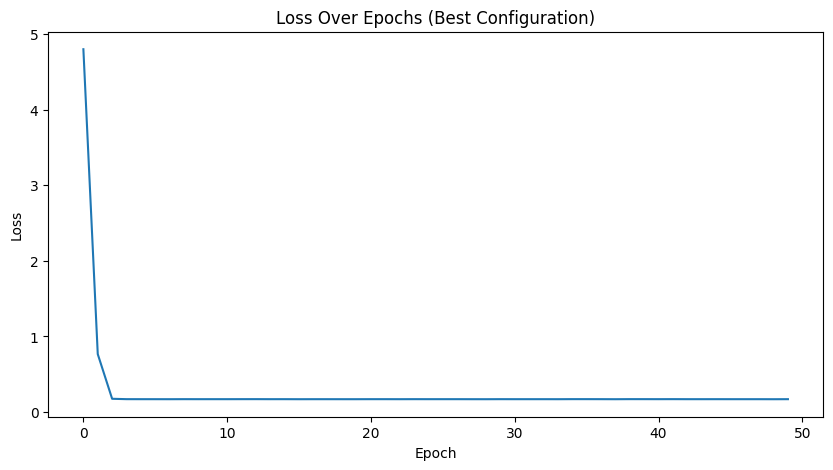

In [13]:
# Visualize the best configuration
best_obs = best_config['Observations']
best_lr = best_config['Learning Rate']
best_loss = best_config['Loss Function']
_, _, _, epoch_losses = train_model(best_obs, best_lr, best_loss, epochs=50)

# Plot Loss Over Epochs
plt.figure(figsize=(10, 5))
plt.plot(epoch_losses)
plt.title('Loss Over Epochs (Best Configuration)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Discussion

Our experiments provided valuable insights into the impact of hyperparameters on the performance of the linear regression model. Below are the key observations regarding the choice of epochs and other parameters:

### Observations on Epochs
Although we increased the number of epochs from **7** to **50** in the best-performing configuration, our results indicate that training for just **7 epochs** is sufficient to achieve optimal performance. Specifically, from epoch 5 onward, the loss values stabilized, fluctuating only between **0.1687** and **0.1695**. This stabilization suggests that further training does not significantly improve model performance.

This behavior raises concerns about potential overfitting, as continued training beyond this point may lead to unnecessary computations without enhancing accuracy. To mitigate this risk, implementing **early stopping** could be beneficial. Early stopping would allow us to terminate training once the loss stabilizes, thereby preventing overfitting and optimizing computational resources.

### Key Insights
1. **Impact of Observations**: Increasing the number of observations generally leads to improved performance metrics, as evidenced by higher R-squared values.
2. **Learning Rate Sensitivity**: The selection of learning rate significantly influences convergence speed and final model accuracy. Lower learning rates can result in slower convergence or underfitting.
3. **Loss Function Comparison**: The Huber loss function often outperformed mean squared error in scenarios where noise was present, demonstrating its robustness against outliers.
4. **Model Stability**: While we did not change the target function in this experiment, the model consistently learned from a defined linear relationship. This indicates that it can effectively approximate known functions with appropriate hyperparameter tuning.

## Conclusion

In summary, this notebook successfully illustrates how various hyperparameters influence the performance of a simple linear regression model using TensorFlow. By systematically varying observation counts, learning rates, and loss functions, we have gained critical insights into optimizing model training for linear regression tasks.

Future work could involve exploring more complex models or datasets that include inherent outliers to further validate these findings and enhance our understanding of model behavior under different conditions.